In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
from pgmpy.models import BayesianModel


In [2]:
# Load Dataset
df = pd.read_csv("India_Menu.csv")
df=pd.DataFrame(df)

In [3]:
df

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Condiments Menu,Tomato Ketchup Sachets,8 g,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05
137,Condiments Menu,Maple Syrup,30 g,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
138,Condiments Menu,Cheese Slice,14 g,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95
139,Condiments Menu,Sweet Corn,40 g,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04


In [4]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [5]:
df.tail()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
136,Condiments Menu,Tomato Ketchup Sachets,8 g,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05
137,Condiments Menu,Maple Syrup,30 g,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
138,Condiments Menu,Cheese Slice,14 g,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95
139,Condiments Menu,Sweet Corn,40 g,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04
140,Condiments Menu,Mixed Fruit Beverage,180 ml,72.25,0.65,0.02,0.02,0.02,0.01,18.00,16.83,0.00,10.80


In [6]:
df.dtypes

Menu Category              object
Menu Items                 object
Per Serve Size             object
Energy (kCal)             float64
Protein (g)               float64
Total fat (g)             float64
Sat Fat (g)               float64
Trans fat (g)             float64
Cholesterols (mg)         float64
Total carbohydrate (g)    float64
Total Sugars (g)          float64
Added Sugars (g)          float64
Sodium (mg)               float64
dtype: object

In [7]:
df.columns

Index(['Menu Category', 'Menu Items', 'Per Serve Size', 'Energy (kCal)',
       'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')

In [8]:
# Returns how many null values are in the column
df.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

<Axes: >

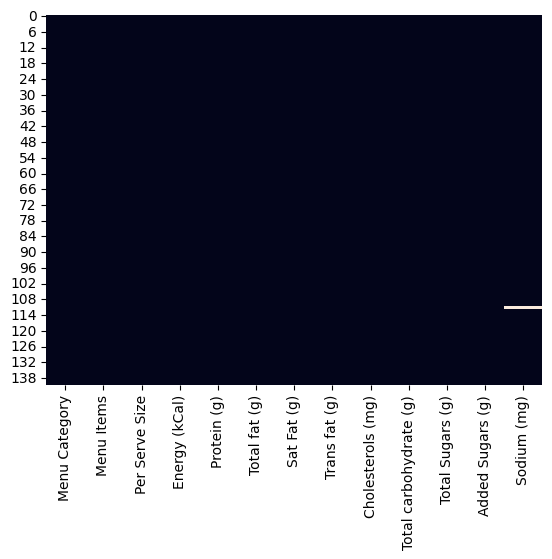

In [9]:
sns.heatmap(df.isnull(),cbar=False)

In [10]:
print(df.isnull().sum().sort_values(ascending=False))

Sodium (mg)               1
Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
dtype: int64


In [11]:
# Calculate statistics for all columns
statistics = df.describe(include='all')
print(statistics)

       Menu Category        Menu Items Per Serve Size  Energy (kCal)  \
count            141               141            141     141.000000   
unique             7               141            107            NaN   
top      McCafe Menu  McVeggie™ Burger         299 ml            NaN   
freq              51                 1              4            NaN   
mean             NaN               NaN            NaN     244.635461   
std              NaN               NaN            NaN     185.554837   
min              NaN               NaN            NaN       0.000000   
25%              NaN               NaN            NaN     116.360000   
50%              NaN               NaN            NaN     219.360000   
75%              NaN               NaN            NaN     339.520000   
max              NaN               NaN            NaN     834.360000   

        Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  \
count    141.000000     141.000000   141.000000     141.000000   
uni

In [12]:
# Show data types and missing values of columns
data_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [13]:
df.nunique()

Menu Category               7
Menu Items                141
Per Serve Size            107
Energy (kCal)             139
Protein (g)               117
Total fat (g)             111
Sat Fat (g)               107
Trans fat (g)              41
Cholesterols (mg)         113
Total carbohydrate (g)    133
Total Sugars (g)          125
Added Sugars (g)           79
Sodium (mg)               139
dtype: int64

In [14]:
# Remove duplicate rows
df.drop_duplicates()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Condiments Menu,Tomato Ketchup Sachets,8 g,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05
137,Condiments Menu,Maple Syrup,30 g,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
138,Condiments Menu,Cheese Slice,14 g,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95
139,Condiments Menu,Sweet Corn,40 g,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04


In [15]:
#Label Encoding 
label_encoder = LabelEncoder()
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].apply(label_encoder.fit_transform)

# Filling in missing values by averaging integer values
integer_columns = df.select_dtypes(include=['int', 'float']).columns
df[integer_columns] = df[integer_columns].fillna(df[integer_columns].mean())
        
# Filling missing values with "Unknown" in String values
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].fillna("Unknown")

In [16]:
df.dropna(subset=['Sodium (mg)'])


,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,6,82,31,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,6,76,22,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,6,80,37,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,6,127,53,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,6,10,33,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2,136,98,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05
137,2,71,69,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
138,2,20,18,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95
139,2,134,87,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04


In [17]:
df.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
dtype: int64

In [18]:
df

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,6,82,31,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,6,76,22,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,6,80,37,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,6,127,53,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,6,10,33,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2,136,98,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05
137,2,71,69,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
138,2,20,18,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95
139,2,134,87,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04


# XGB algorithm

In [19]:
# Separate data into independent variables (X) and target variable (y)
X = df.drop(['Energy (kCal)'], axis=1)
y = df['Energy (kCal)']

# Separate training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost Regressor model
model = xgb.XGBRegressor()

# Model training
model.fit(X_train, y_train)

# Make predictions on test data set
y_pred = model.predict(X_test)

# Evaluating the performance of forecasts (for example, mean square error)
mse = mean_squared_error(y_test, y_pred)
print("Ortalama Kare Hata (MSE):", mse)


Ortalama Kare Hata (MSE): 4415.033571166417


#Bayes Network ile Hesaplama

In [20]:
# Select Raw material and Energy (kCal) columns
data = df[['Menu Category', 'Menu Items', 'Per Serve Size', 'Energy (kCal)']]

# Check NaN values and handle accordingly
data = data.dropna() # Remove rows with NaN values

#Create Bayesian network model to determine the relationship between raw material and Energy (kCal)
model = BayesianModel([
    ('Menu Category', 'Energy (kCal)'),
    ('Menu Items', 'Energy (kCal)'),
    ('Per Serve Size', 'Energy (kCal)')
])

# Determine probability distributions of relationships between raw material and Energy (kCal)
model.fit(data)



/usr/local/lib/python3.10/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [ ]:
new_data = {
    'Menu Category': 'Regular Menu',
    'Menu Items': 'McVeggie™ Burger',
    'Per Serve Size': '168g'
}

# Estimate Energy (kCal)
result = model.predict_proba(new_data)['Energy (kCal)']
print("Energy (kCal) Tahmini:", result)

#Displaying performance metrics

In [21]:
#Calculation of performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Showing the results of performance metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 4415.033571166417
Mean Absolute Error: 37.191288706023116
R2 Score: 0.8956576987098835


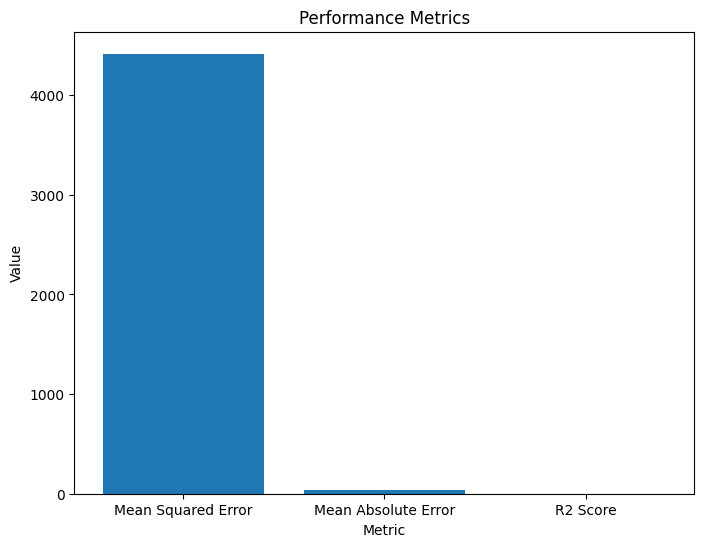

In [22]:
#List of performance metrics
metrics = [mse, mae, r2]
metric_names = ['Mean Squared Error', 'Mean Absolute Error', 'R2 Score']

#Graph of performance metrics
plt.figure(figsize=(8, 6))
plt.bar(metric_names, metrics)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Performance Metrics')


plt.show()

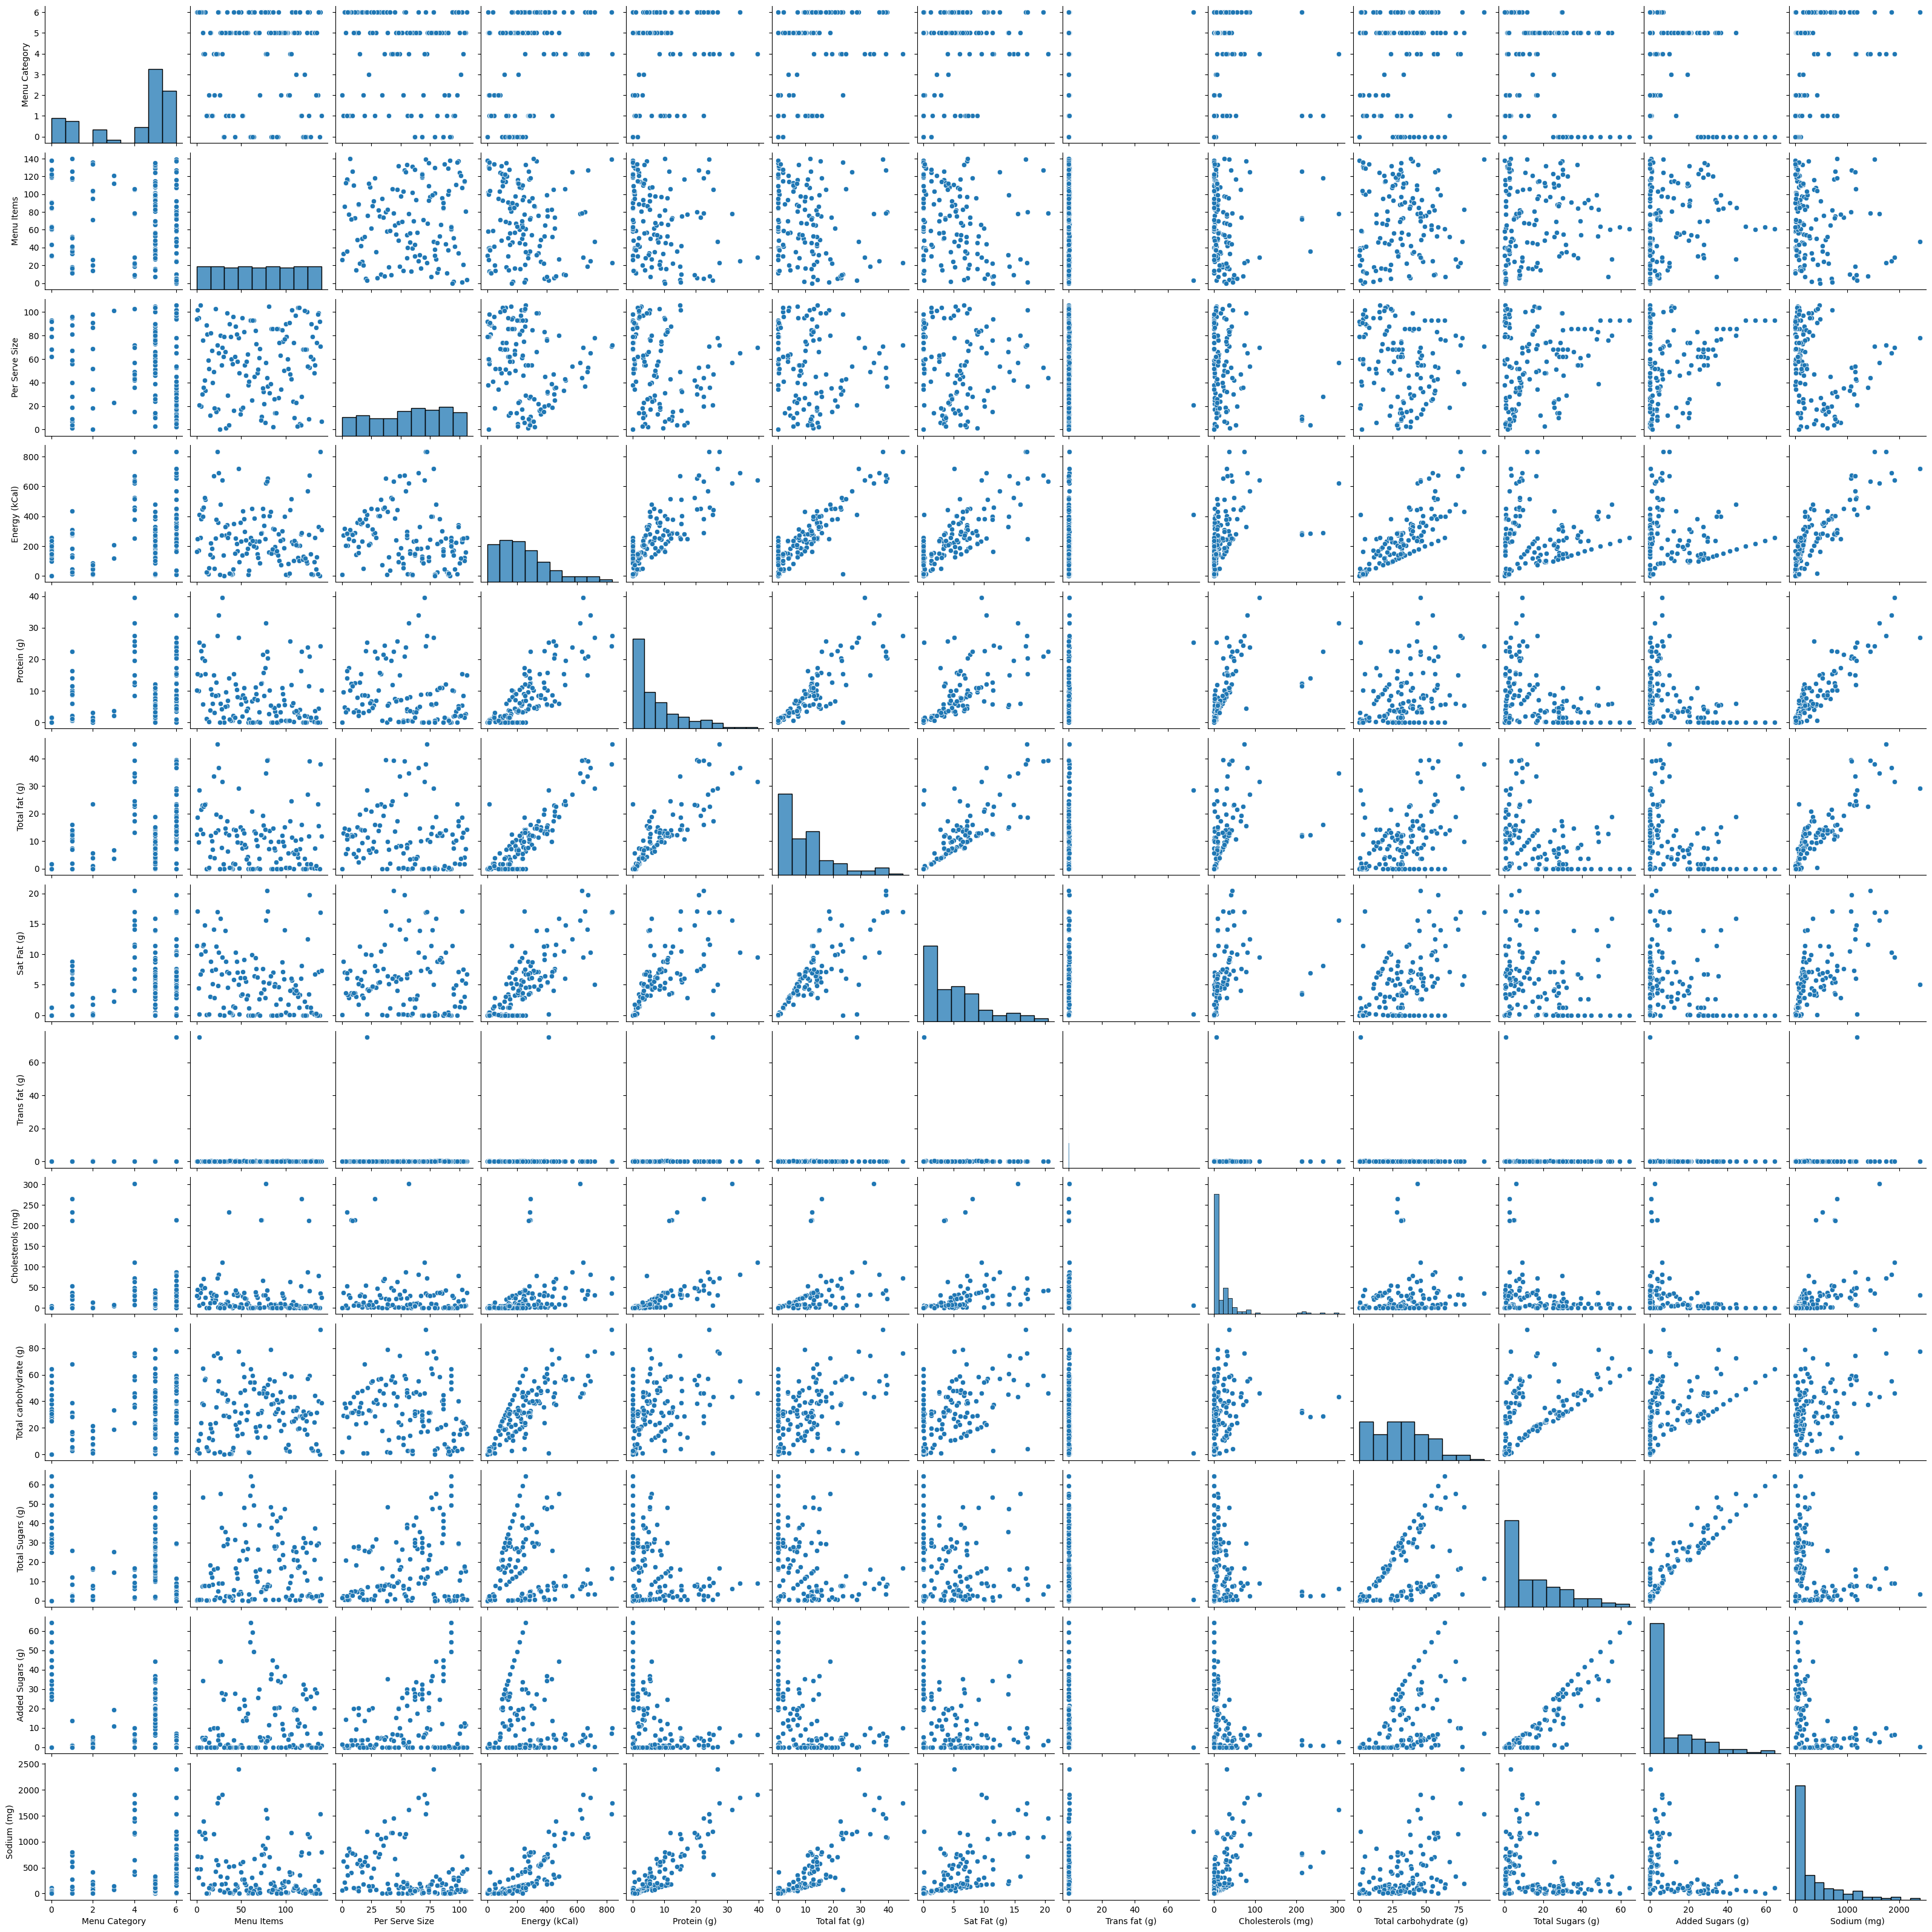

In [23]:
sns.pairplot(df)

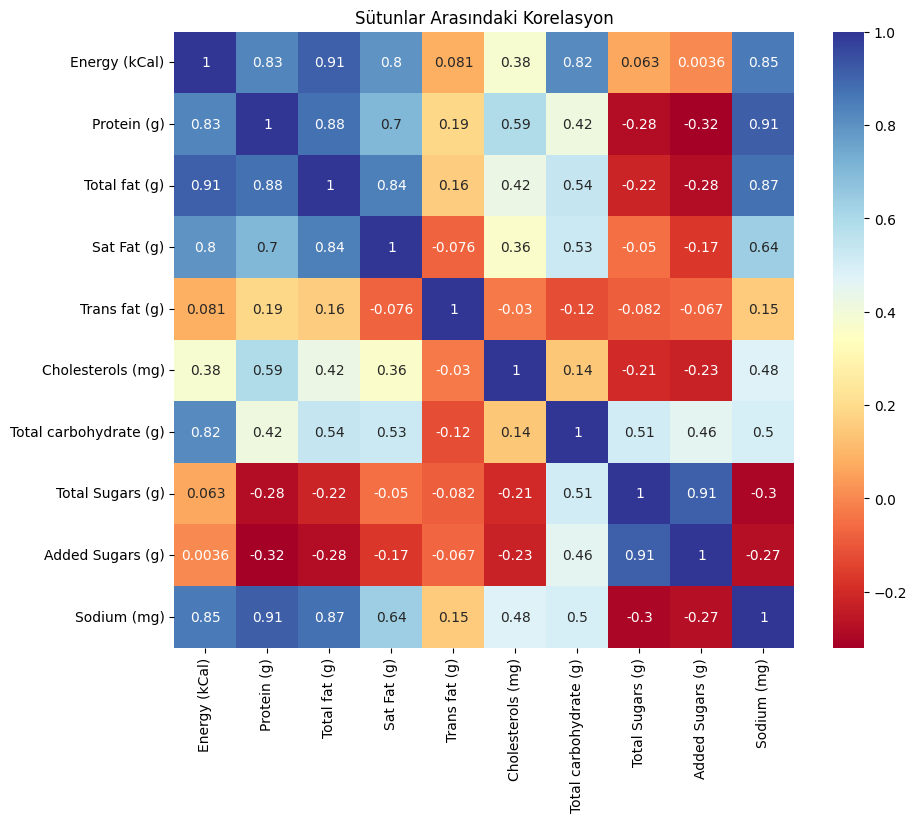

In [40]:
warnings.filterwarnings("ignore")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Sütunlar Arasındaki Korelasyon')
plt.show()